In [1]:
import generate_datasets as ds
from MNIST_functions import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generate permuted and rotated tasks 
permuted_train_loaders, permuted_test_loaders, rotated_train_loaders, rotated_test_loaders = ds.load_datasets(num_tasks_permute=10, num_tasks_rotate=10)

In [3]:
#Run experiment 2A for permutated MNIST on 3 tasks

epoch_accuracies_SGD, epoch_accuracies_EWC, epoch_accuracies_L2 = run_experiment_2A( permuted_train_loaders[0:3], permuted_test_loaders[0:3])

Learning rate: 0.001, Dropout input: 0.0, Dropout hidden: 0.0, Early stopping: False, Num hidden layers: 2, Width hidden layers: 400, Epochs: 20
Epoch 1/20, Accuracy on test set 0: 0.9430
Epoch 2/20, Accuracy on test set 0: 0.9521
Epoch 3/20, Accuracy on test set 0: 0.9590
Epoch 4/20, Accuracy on test set 0: 0.9633
Epoch 5/20, Accuracy on test set 0: 0.9652
Epoch 6/20, Accuracy on test set 0: 0.9663
Epoch 7/20, Accuracy on test set 0: 0.9695
Epoch 8/20, Accuracy on test set 0: 0.9700
Epoch 9/20, Accuracy on test set 0: 0.9691
Epoch 10/20, Accuracy on test set 0: 0.9717
Epoch 11/20, Accuracy on test set 0: 0.9717
Epoch 12/20, Accuracy on test set 0: 0.9714
Epoch 13/20, Accuracy on test set 0: 0.9733
Epoch 14/20, Accuracy on test set 0: 0.9726
Epoch 15/20, Accuracy on test set 0: 0.9743
Epoch 16/20, Accuracy on test set 0: 0.9738
Epoch 17/20, Accuracy on test set 0: 0.9736
Epoch 18/20, Accuracy on test set 0: 0.9741
Epoch 19/20, Accuracy on test set 0: 0.9743
Epoch 20/20, Accuracy on tes

In [7]:
#Define function for ploting for 2A
def plot_experiment_2A(epoch_accuracies_SGD, epoch_accuracies_EWC, epoch_accuracies_L2):
    sgd_A = [epoch_accuracies_SGD[0][0], epoch_accuracies_SGD[1][0], epoch_accuracies_SGD[2][0]]
    ewc_A = [epoch_accuracies_EWC[0][0], epoch_accuracies_EWC[1][0], epoch_accuracies_EWC[2][0]]
    l2_A = [epoch_accuracies_L2[0][0], epoch_accuracies_L2[1][0], epoch_accuracies_L2[2][0]]
    
    sgd_B = [epoch_accuracies_SGD[1][1], epoch_accuracies_SGD[2][1]]
    ewc_B = [epoch_accuracies_EWC[1][1], epoch_accuracies_EWC[2][1]]
    l2_B = [epoch_accuracies_L2[1][1], epoch_accuracies_L2[2][1]]
    
    sgd_C = [epoch_accuracies_SGD[2][2]]
    ewc_C = [epoch_accuracies_EWC[2][2]]
    l2_C = [epoch_accuracies_L2[2][2]]
    
    def flatten(lst):
        return [item for sublist in lst for item in sublist]
    
    sgd_A_flat, ewc_A_flat, l2_A_flat = map(flatten, [sgd_A, ewc_A, l2_A])
    sgd_B_flat, ewc_B_flat, l2_B_flat = map(flatten, [sgd_B, ewc_B, l2_B])
    sgd_C_flat, ewc_C_flat, l2_C_flat = map(flatten, [sgd_C, ewc_C, l2_C])
    
    max_len_A = len(sgd_A_flat)
    time_A = np.arange(max_len_A)
    
    max_len_B = len(sgd_B_flat)
    time_B = np.arange(max_len_B)
    
    max_len_C = len(sgd_C_flat)
    time_C = np.arange(max_len_C)
    
    def pad_with_nans(original, max_len):
        return [np.nan] * (max_len - len(original)) + original
    
    sgd_B_padded, ewc_B_padded, l2_B_padded = map(lambda x: pad_with_nans(x, max_len_A), [sgd_B_flat, ewc_B_flat, l2_B_flat])
    sgd_C_padded, ewc_C_padded, l2_C_padded = map(lambda x: pad_with_nans(x, max_len_A), [sgd_C_flat, ewc_C_flat, l2_C_flat])
    
    time_B_padded = np.arange(len(sgd_B_padded))
    time_C_padded = np.arange(len(sgd_C_padded))
    
    fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
    colors = {'ewc': 'red', 'l2': 'green', 'sgd': 'blue'}
    
    axes[0].plot(time_A, sgd_A_flat, label="SGD", color=colors['sgd'], alpha=0.8)
    axes[0].plot(time_A, ewc_A_flat, label="EWC", color=colors['ewc'], alpha=0.8)
    axes[0].plot(time_A, l2_A_flat, label="L2", color=colors['l2'], alpha=0.8)
    axes[0].axvline(x=19, color='gray', linestyle='--', linewidth=1)
    axes[0].axvline(x=39, color='gray', linestyle='--', linewidth=1)
    axes[0].set_ylabel("Task A")
    axes[0].set_ylim(0.75, 1)
    axes[0].legend(loc="lower left")
    axes[0].set_xticklabels([])
    
    axes[1].plot(time_B_padded, sgd_B_padded, label="SGD", color=colors['sgd'], alpha=0.8)
    axes[1].plot(time_B_padded, ewc_B_padded, label="EWC", color=colors['ewc'], alpha=0.8)
    axes[1].plot(time_B_padded, l2_B_padded, label="L2", color=colors['l2'], alpha=0.8)
    axes[1].axvline(x=19, color='gray', linestyle='--', linewidth=1)
    axes[1].axvline(x=39, color='gray', linestyle='--', linewidth=1)
    axes[1].set_ylabel("Task B")
    axes[1].set_ylim(0.75, 1)
    axes[1].legend(loc="lower left")
    axes[1].set_xticklabels([])
    
    axes[2].plot(time_C_padded, sgd_C_padded, label="SGD", color=colors['sgd'], alpha=0.8)
    axes[2].plot(time_C_padded, ewc_C_padded, label="EWC", color=colors['ewc'], alpha=0.8)
    axes[2].plot(time_C_padded, l2_C_padded, label="L2", color=colors['l2'], alpha=0.8)
    axes[2].axvline(x=19, color='gray', linestyle='--', linewidth=1)
    axes[2].axvline(x=39, color='gray', linestyle='--', linewidth=1)
    axes[2].set_xlabel("Training time")
    axes[2].set_ylabel("Task C")
    axes[2].set_ylim(0.75, 1)
    axes[2].legend(loc="lower left")
    axes[2].set_xticklabels([])
    
    plt.tight_layout()
    plt.show()


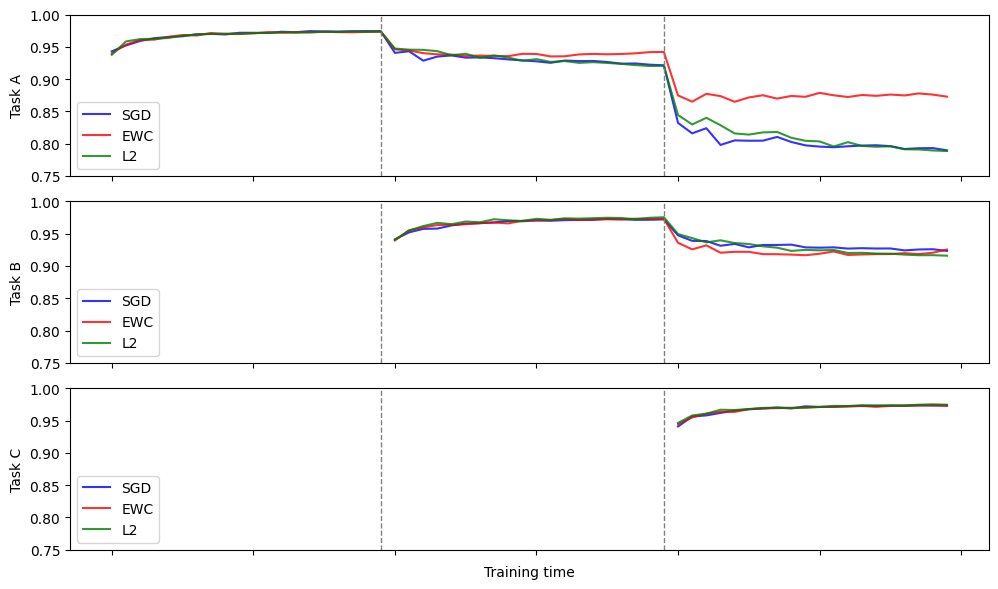

In [8]:
#Plot results for experiment 2A on permutated MNIST
plot_experiment_2A(epoch_accuracies_SGD, epoch_accuracies_EWC, epoch_accuracies_L2)

Trial 1/1: Learning rate=0.00009, Hidden layer width=1044
Training on Task 1
Task 1, Epoch 1/10, SGD Loss: 0.0010
Task 1, Epoch 1/10, EWC Loss: 0.0009
Task 1, Epoch 2/10, SGD Loss: 0.0011
Task 1, Epoch 2/10, EWC Loss: 0.0007
Task 1, Epoch 3/10, SGD Loss: 0.0009
Task 1, Epoch 3/10, EWC Loss: 0.0011
Task 1, Epoch 4/10, SGD Loss: 0.0007
Task 1, Epoch 4/10, EWC Loss: 0.0005
Task 1, Epoch 5/10, SGD Loss: 0.0006
Task 1, Epoch 5/10, EWC Loss: 0.0004
Task 1, Epoch 6/10, SGD Loss: 0.0004
Task 1, Epoch 6/10, EWC Loss: 0.0004
Task 1, Epoch 7/10, SGD Loss: 0.0002
Task 1, Epoch 7/10, EWC Loss: 0.0004
Task 1, Epoch 8/10, SGD Loss: 0.0007
Task 1, Epoch 8/10, EWC Loss: 0.0011
Task 1, Epoch 9/10, SGD Loss: 0.0004
Task 1, Epoch 9/10, EWC Loss: 0.0006
Task 1, Epoch 10/10, SGD Loss: 0.0004
Task 1, Epoch 10/10, EWC Loss: 0.0003
Training on Task 2
Task 2, Epoch 1/10, SGD Loss: 0.0011
Task 2, Epoch 1/10, EWC Loss: 0.0011
Task 2, Epoch 2/10, SGD Loss: 0.0010
Task 2, Epoch 2/10, EWC Loss: 0.0010
Task 2, Epoch 

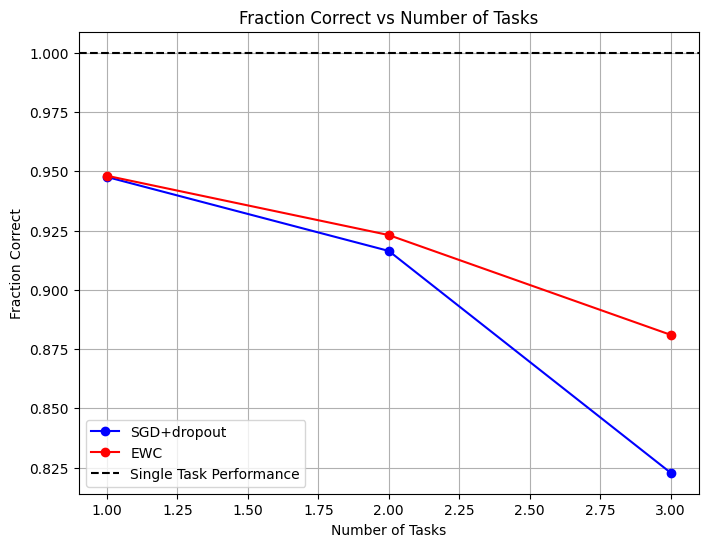

(None, None)

In [3]:
#Run experiment 2B on permutated MNIST 

acc_sgd, acc_ewc = run_experiment_2B(permuted_train_loaders[0:3],permuted_test_loaders[0:3])

In [ ]:
#Plot results for experiment 2B on permutated MNIST

num_tasks = len(permuted_test_loaders[0:3])
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_tasks + 1), acc_sgd, label='SGD+dropout', marker='o', color='blue')
plt.plot(range(1, num_tasks + 1), acc_ewc, label='EWC', marker='o', color='red')
plt.axhline(y=1.0, linestyle='--', color='black', label='Single Task Performance')
plt.xlabel('Number of Tasks')
plt.ylabel('Fraction Correct')
plt.legend()
plt.title('Fraction Correct vs Number of Tasks')
plt.grid(True)
plt.show()